In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
df = pd.read_csv('data/insurance.csv')
print("Number of Datapoints:", len(df))
df.head()

Number of Datapoints: 1338


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.duplicated().sum()

np.int64(1)

In [11]:
df[df.duplicated(keep=False)]


,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [13]:
# In real life 2 people can have the same age, sex, bmi, children, smoker, region, and charges values, but since this is synthetic data, removing duplicate row
df.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [17]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

<Axes: xlabel='charges', ylabel='Count'>

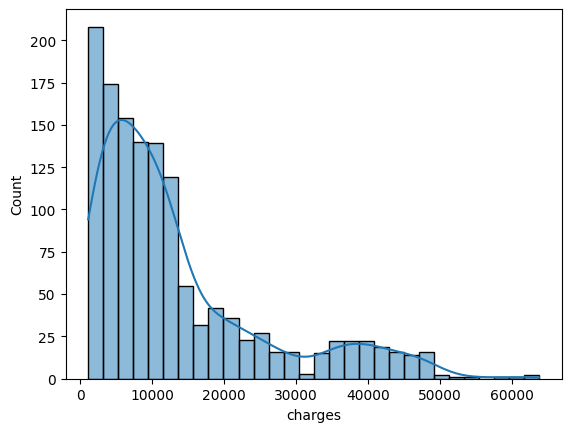

In [18]:
sns.histplot(df['charges'], kde=True)

<Axes: ylabel='charges'>

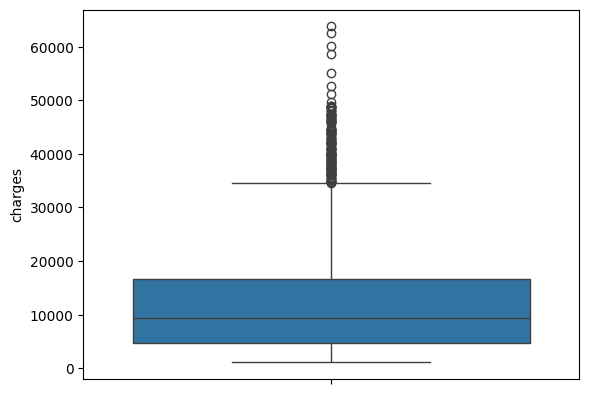

In [24]:
sns.boxplot(y=df['charges'])

Target data (charges) is right-skewed as expected with cost/price data. Could take the log of "charges" during feature engineering to make normality assumptions closer to true for linear regression models. "Outliers" are not really outliers as high charges are expected of those with high BMI, smokers, etc. 

In [23]:
# Separating into categorical and numerical data
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print(f'There are {len(numeric_features)} numeric features: {numeric_features}')
print(f'There are {len(categorical_features)} categorical features: {categorical_features}')

There are 4 numeric features: ['age', 'bmi', 'children', 'charges']
There are 3 categorical features: ['sex', 'smoker', 'region']


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

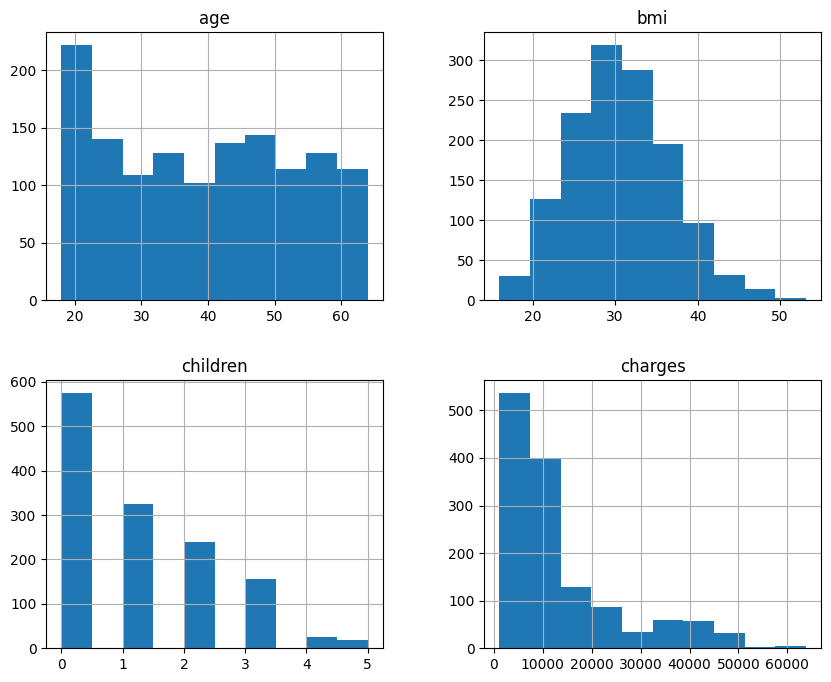

In [46]:
# Univariate analysis of numerical and categorical data
df[numeric_features].hist(figsize=(10,8))


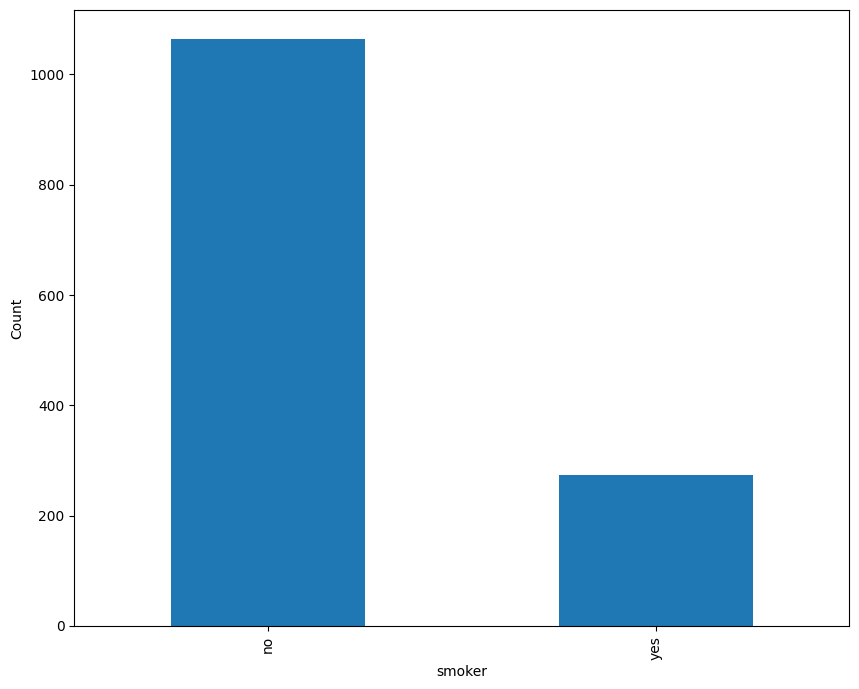

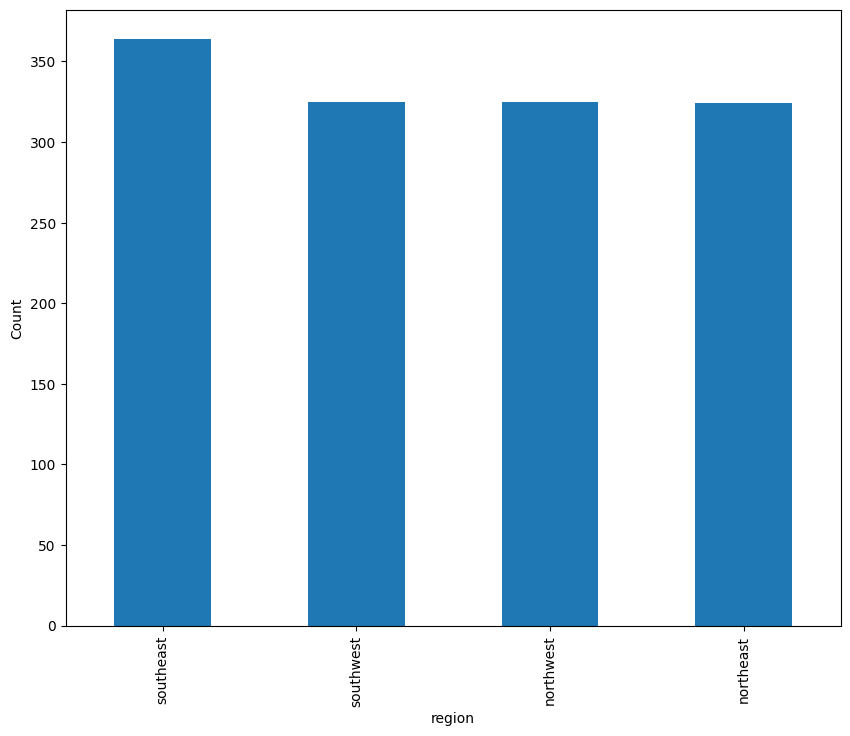

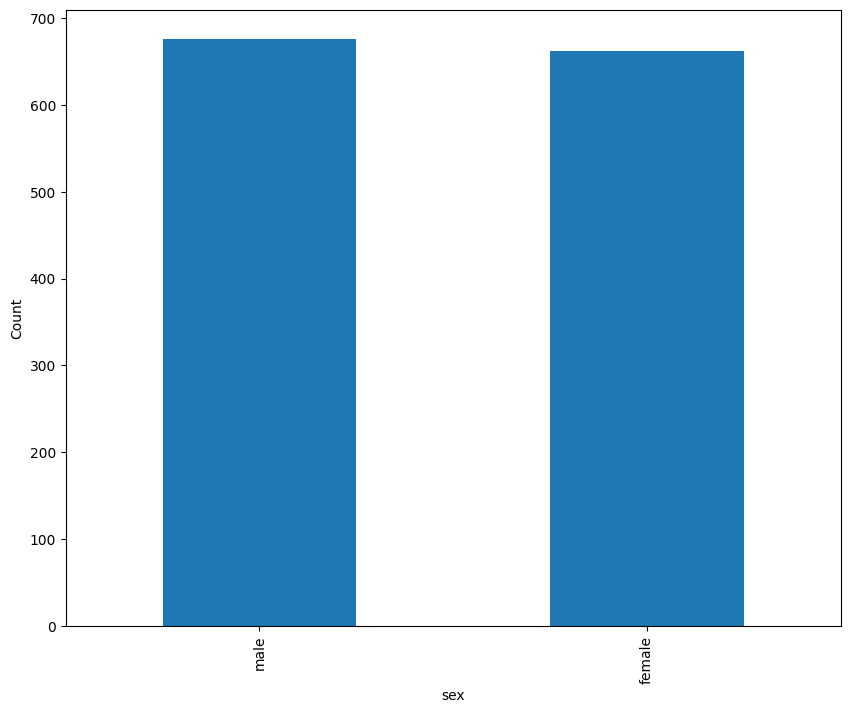

In [44]:
cat_cols = ['smoker', 'region', 'sex']
for col in cat_cols:
    df[col].value_counts().plot(kind='bar')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


Age is spread out from late teens to mid 60s, with late teens to mid 20s being the highest. BMI is mostly in the bordering overweight to overweight range. Most have 0 children which makes sense given that 20s is the most prominent age group.

<Axes: >

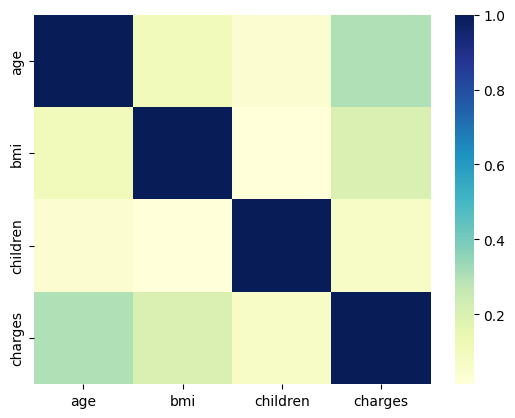

In [47]:
# Bivariate analysis of numerical and categorical data
sns.heatmap(df.corr(numeric_only=True), cmap="YlGnBu")

<Axes: xlabel='bmi', ylabel='charges'>

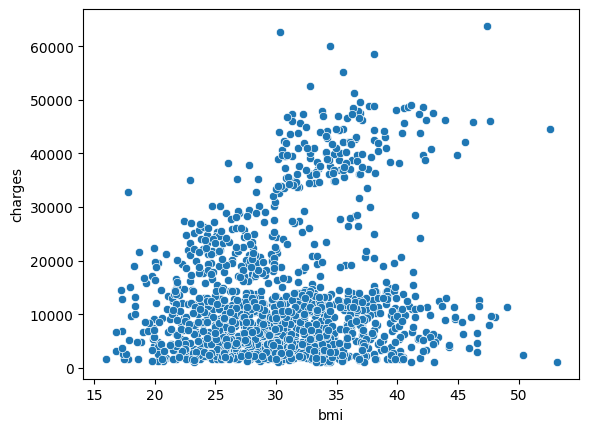

In [50]:
sns.scatterplot(data=df, x='bmi', y='charges')

Age has a moderate-positive correlation with charges, BMI has a moderate correlation, and children has weak/zero correlation. There is no significant multicollinearity between predictors. It is interesting that those with a BMI between 30-40 have higher charges, while those with BMIs greater than 40 have mostly low charges, suggesting other factors might be affected charge rises for those with 30-40 BMI.

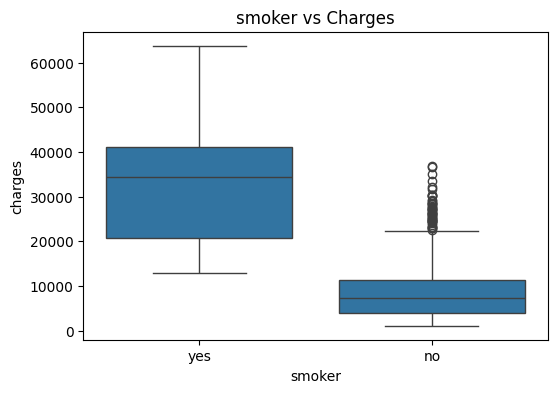

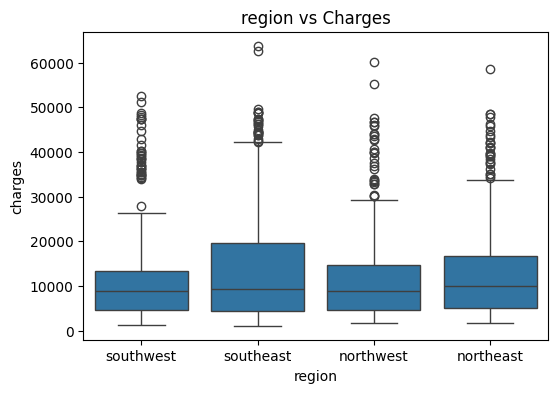

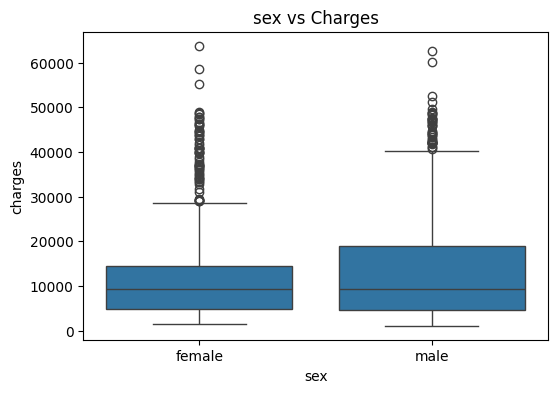

In [48]:
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x=col, y='charges')
    plt.title(f"{col} vs Charges")
    plt.show()

A smoker is significantly correlated with a higher charge, the southeast region tends to be very slightly correlated with a higher charge, and males and females have about the same median suggesting that sex is not a key factor in the charges. 

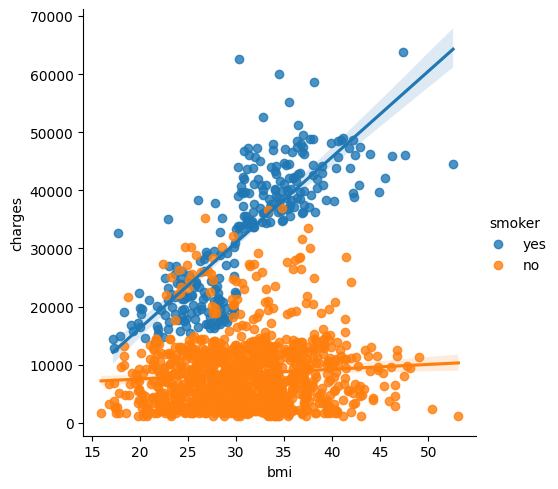

In [51]:
# Plotting interaction effects since BMI vs. Charges correlation seems to be effected by some other factor 
sns.lmplot(data=df, x='bmi', y='charges', hue='smoker')


It can be seen that smokers have much higher charges, and smokers with high BMIs have the highest charges. Smokers with high BMIs make up the 30-40 BMI range, which explains why the charges were higher in the earlier scatterplot for this BMI range and not for the >40 BMI range. Therefore, being a smoker is the most correlated with a high charge, and being a smoker and having a high BMI has an even higher correlation.